# Information Cascades en Grafos

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = "./results.csv"
def wipeResults(filename):
    f = open(filename,"w+")
    f.write("Graph type;Number of nodes;Edge chance;Opinions affected by Cascade;Opinions Changed by Cascade;Exploration Mode\n")



## Experimento 1: influencia de Edge Chance en Opiniones 

In [3]:
filename ="./data/edgeChance.csv"
wipeResults(filename)
repetitions = 10
noLogs = 'true'
numberOfNodes = 50
for e in np.arange(0,1.1,0.1):
    for i in range(repetitions):
        !node index $filename $e $noLogs $numberOfNodes 

In [4]:
df = pd.read_csv(filename, sep=";")
df.head(11)

,Graph type,Number of nodes,Edge chance,Opinions affected by Cascade,Opinions Changed by Cascade,Exploration Mode
0,random,50,0.0,0,0,bfs
1,random,50,0.0,0,0,bfs
2,random,50,0.0,0,0,bfs
3,random,50,0.0,0,0,bfs
4,random,50,0.0,0,0,bfs
5,random,50,0.0,0,0,bfs
6,random,50,0.0,0,0,bfs
7,random,50,0.0,0,0,bfs
8,random,50,0.0,0,0,bfs
9,random,50,0.0,0,0,bfs


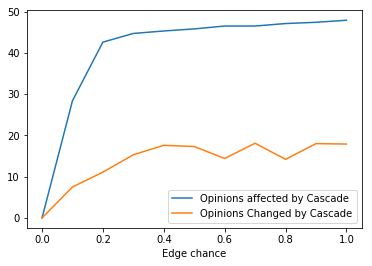

In [6]:
edgeChanceDf = df.copy()
groupDf = edgeChanceDf.groupby("Edge chance").mean()
groupDf[["Opinions affected by Cascade","Opinions Changed by Cascade"]].plot()

## Experimento 2: Relacion entre numero de nodos y Opiniones

In [18]:
filename ="./data/numberOfNodes.csv"
wipeResults(filename)
repetitions = 10
noLogs = 'true'
edgeChance = 0.8
for n in np.arange(50,501,50):
    for i in range(repetitions):
        !node index $filename $edgeChance $noLogs $n

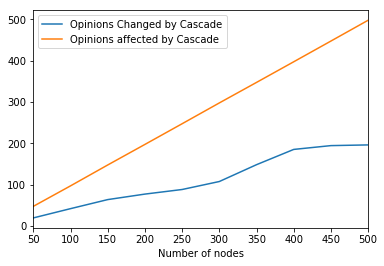

In [19]:
df = pd.read_csv(filename, sep=";")
numberOfNodesDf = df.copy()
numberOfNodesDf[['Opinions affected by Cascade %']] = numberOfNodesDf[['Opinions affected by Cascade']].div(numberOfNodesDf['Number of nodes'].values, axis=0)
groupDf = numberOfNodesDf.groupby("Number of nodes").mean()
groupDf[["Opinions Changed by Cascade","Opinions affected by Cascade"]].plot()

#### Cambia el porcentaje?

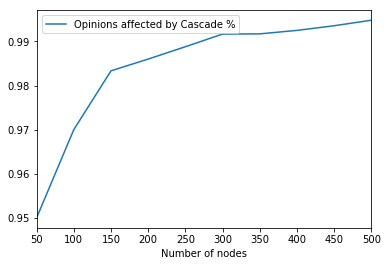

In [20]:
groupDf[["Opinions affected by Cascade %"]].plot()

### Experimento 3: Analisis cualitativo del grafo 

In [28]:
import matplotlib.pyplot as plt
import networkx as nx

In [29]:
!node index.js

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

BFS queue:  [ 1, 6, 11, 14, 17, 18 ]
Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

BFS queue:  [ 6, 11, 14, 17, 18, 3, 4, 5, 10, 16 ]
Node : 6 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 6 decides:  red 

BFS queue:  [ 11, 14, 17, 18, 3, 4, 5, 10, 16, 2, 8, 12, 13, 19 ]
Node : 11 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 11 decides:  red 

BFS queue:  [ 14, 17, 18, 3, 4, 5, 10, 16, 2, 8, 12, 13, 19 ]
Node : 14 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 14 decides:  red 

BFS queue:  [ 17, 18, 3, 4, 5, 10, 16, 2, 8, 12, 13, 19, 9 ]
Node : 17 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 17 decides:  red 

BFS queue:  [ 18, 3, 4, 5, 

Ejes: (1, 3)
Ejes: (1, 4)
Ejes: (1, 5)
Ejes: (1, 6)
Ejes: (1, 10)
Ejes: (1, 16)


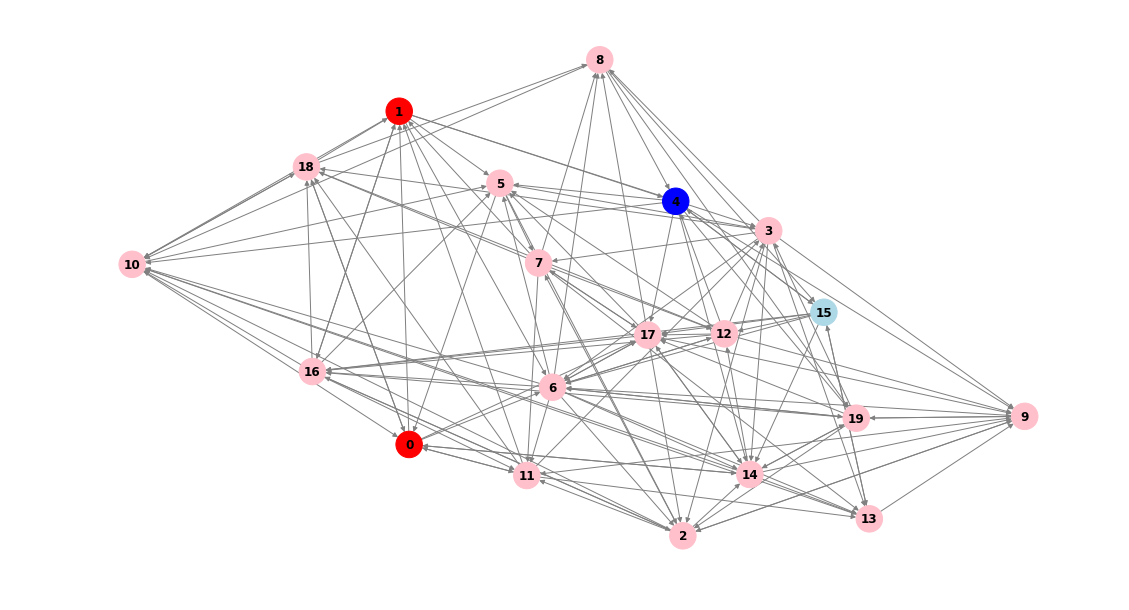

In [41]:
f = open("./graphInfo",'r')
# print(f.read())
[nodes,edges,decisions] = f.read().split(';')
nodes = nodes.split(',')
edges = edges.split('-')
decisions = decisions.split(',')
for i in range(len(nodes)):
    nodes[i] = eval(nodes[i])

for i in range(len(edges)):
    edges[i] = eval(edges[i])
    edges[i] = (edges[i][1],edges[i][0])
    
for i in range(len(edges)):
    if(edges[i][0] == 1):
        print("Ejes:",edges[i])
        
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
plt.figure(figsize=(15,8))
nx.draw_spring(G, node_color=decisions, with_labels=True, font_weight='bold', edge_color='grey',node_size=700)


# Descomentar para dibujar en circulo
# nx.draw_circular(G, node_color=decisions, with_labels=True, font_weight='bold', edge_color='grey',node_size=700)
# plt.savefig("graph.png")


## Experimento 4: Diferencia en resultados entre recorridos bfs y random

In [42]:
filename ="./data/recorridos.csv"
wipeResults(filename)
repetitions = 20
noLogs = 'true'
edgeChance = 0.3
graphFileName = './graphInfo'
for numberOfNodes in np.arange(50,501,50):
    for explorationMode in ['bfs','random']:
        for i in range(repetitions):
            !node index $filename $edgeChance $noLogs $numberOfNodes $graphFileName $explorationMode

In [43]:
df = pd.read_csv("./data/recorridos.csv", sep=";")
df.head(21)

,Graph type,Number of nodes,Edge chance,Opinions affected by Cascade,Opinions Changed by Cascade,Exploration Mode
0,random,50,0.3,45,17,bfs
1,random,50,0.3,42,9,bfs
2,random,50,0.3,44,10,bfs
3,random,50,0.3,44,14,bfs
4,random,50,0.3,45,9,bfs
5,random,50,0.3,45,15,bfs
6,random,50,0.3,41,16,bfs
7,random,50,0.3,43,17,bfs
8,random,50,0.3,43,27,bfs
9,random,50,0.3,45,18,bfs


In [108]:
dfRecorridos = df.copy()
dfRecorridos = dfRecorridos.groupby(["Exploration Mode","Number of nodes"]).mean()
dfRecorridos.head(20)

Edge chance  Opinions affected by Cascade  \
Exploration Mode Number of nodes                                              
bfs              50                       0.1                         31.35   
                 100                      0.1                         84.55   
                 150                      0.1                        135.00   
                 200                      0.1                        184.10   
                 250                      0.1                        233.85   
                 300                      0.1                        284.50   
                 350                      0.1                        334.95   
                 400                      0.1                        385.55   
                 450                      0.1                        435.75   
                 500                      0.1                        485.20   
random           50                       0.1                         27.80   
                 100                      0.1                         76.15   
                 150                      0.1                        126.05   
                 200                      0.1                        175.50   
                 250                      0.1                        226.65   
                 300                      0.1                        275.35   
                 350                      0.1                        325.90   
                 400                      0.1                        375.95   
                 450                      0.1                        425.75   
                 500                      0.1                        476.80   

                                  Opinions Changed by Cascade  
Exploration Mode Number of nodes                               
bfs              50                                      9.05  
                 100                                    27.05  
                 150                                    46.90  
                 200                                    59.85  
                 250                                    76.90  
                 300                                    92.95  
                 350                                   111.10  
                 400                                   127.20  
                 450                                   159.70  
                 500                                   172.90  
random           50                                      7.60  
                 100                                    22.85  
                 150                                    39.00  
                 200                                    55.05  
                 250                                    72.50  
                 300                                    87.25  
                 350                                   106.55  
                 400                                   123.20  
                 450                                   142.20  
                 500                                   157.90

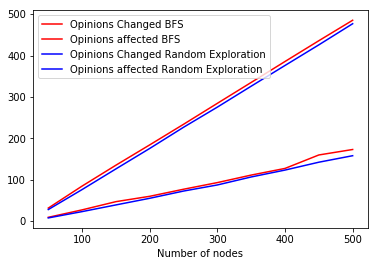

In [114]:
fig,a = plt.subplots(1,1)
dfBFS = dfRecorridos.xs('bfs')[["Opinions Changed by Cascade", "Opinions affected by Cascade"]]
dfBFS = dfBFS.rename(columns={"Opinions Changed by Cascade":"Opinions Changed BFS", "Opinions affected by Cascade":"Opinions affected BFS"})

dfRandom = dfRecorridos.xs('random')[["Opinions Changed by Cascade", "Opinions affected by Cascade"]]
dfRandom = dfRandom.rename(columns={"Opinions Changed by Cascade":"Opinions Changed Random Exploration", "Opinions affected by Cascade":"Opinions affected Random Exploration"})

dfBFS.plot(ax=a, color='r')
dfRandom.plot(ax=a, color='b')


#### Probemos de nuevo, esta vez con mayor cantidad de nodos y menor edge chance y una mejor visualizacion

In [37]:
filename ="./data/recorridos.csv"
wipeResults(filename)
repetitions = 5
noLogs = 'true'
edgeChance = 0.001
graphType = 'network'
graphFileName = './graphInfo'
for numberOfNodes in np.arange(500,6001,500):
    for explorationMode in ['bfs','random']:
        for i in range(repetitions):
            !node index $filename $edgeChance $noLogs $numberOfNodes $graphFileName $graphType $explorationMode

In [39]:
df = pd.read_csv("./data/recorridos.csv", sep=";")
dfRecorridos = df.copy()
dfRecorridos = dfRecorridos.groupby(["Exploration Mode","Number of nodes"]).mean()
fig,a = plt.subplots(1,2)

dfBFS = dfRecorridos.xs('bfs')[["Opinions Changed by Cascade"]]
dfBFS = dfBFS.rename(columns={"Opinions Changed by Cascade":"Opinions Changed BFS"})
dfBFSAffected = dfRecorridos.xs('bfs')[["Opinions affected by Cascade"]]
dfBFSAffected = dfBFSAffected.rename(columns={"Opinions affected by Cascade":"Opinions affected BFS"})

dfRandom = dfRecorridos.xs('random')[["Opinions Changed by Cascade"]]
dfRandom = dfRandom.rename(columns={"Opinions Changed by Cascade":"Opinions Changed Random Exploration"})

dfRandomAffected = dfRecorridos.xs('random')[[ "Opinions affected by Cascade"]]
dfRandomAffected = dfRandomAffected.rename(columns={"Opinions affected by Cascade":"Opinions affected Random Exploration"})


dfBFS.plot(ax=a[0], color='r',figsize=(15,8))
dfRandom.plot(ax=a[0], color='b')
dfBFSAffected.plot(ax=a[1], color='r')
dfRandomAffected.plot(ax=a[1], color='b')


Edge chance  Opinions affected by Cascade  \
Exploration Mode Number of nodes                                              
bfs              50                     0.001                             0   
                 100                    0.001                             0   
                 150                    0.001                             0   
                 200                    0.001                             0   
                 250                    0.001                             0   
                 300                    0.001                             0   
                 350                    0.001                             0   
                 400                    0.001                             0   
                 450                    0.001                             0   
                 500                    0.001                             0   
                 550                    0.001                             0   
random           50                     0.001                             0   
                 100                    0.001                             0   
                 150                    0.001                             0   
                 200                    0.001                             0   
                 250                    0.001                             0   
                 300                    0.001                             3   
                 350                    0.001                             3   
                 400                    0.001                            10   
                 450                    0.001                             9   
                 500                    0.001                            10   
                 550                    0.001                            19   

                                  Opinions Changed by Cascade  
Exploration Mode Number of nodes                               
bfs              50                                         0  
                 100                                        0  
                 150                                        0  
                 200                                        0  
                 250                                        0  
                 300                                        0  
                 350                                        0  
                 400                                        0  
                 450                                        0  
                 500                                        0  
                 550                                        0  
random           50                                         0  
                 100                                        0  
                 150                                        0  
                 200                                        0  
                 250                                        0  
                 300                                        2  
                 350                                        1  
                 400                                        3  
                 450                                        1  
                 500                                        0  
                 550                                        5

# Experimento 5: diferencia entre BFS y random variando cantidad de ejes

In [67]:
filename ="./data/recorridos.csv"
wipeResults(filename)
repetitions = 60
noLogs = 'true'
edgeChance = 0.001
numberOfNodes = 1000
graphType = 'network'
graphFileName = './graphInfo'
for edgeChance in np.arange(0,1.1,0.1):
    for explorationMode in ['bfs','random']:
        for i in range(repetitions):
            !node index $filename $edgeChance $noLogs $numberOfNodes $graphFileName $graphType $explorationMode

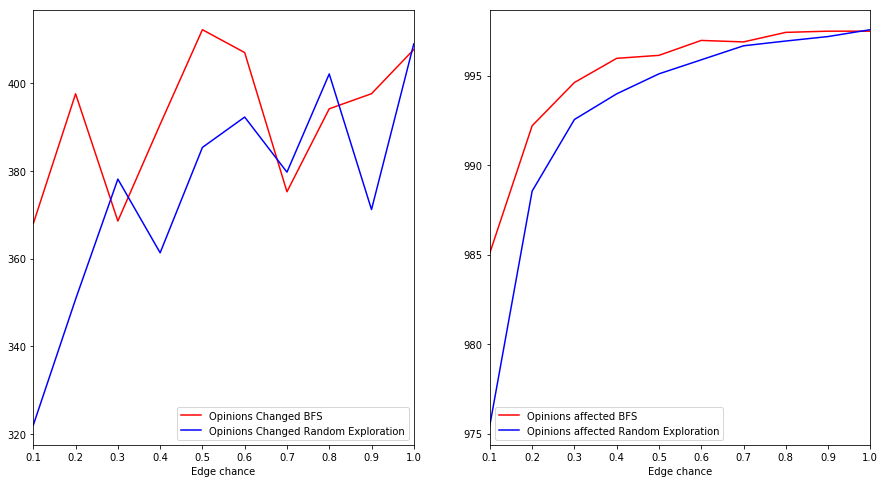

In [68]:
df = pd.read_csv("./data/recorridos.csv", sep=";")
dfRecorridos = df.copy()
dfRecorridos = dfRecorridos[dfRecorridos["Edge chance"] != 0.0]
dfRecorridos = dfRecorridos.groupby(["Exploration Mode","Edge chance"]).mean()
# dfRecorridos.head(300)
fig,a = plt.subplots(1,2)

dfBFS = dfRecorridos.xs('bfs')[["Opinions Changed by Cascade"]]
dfBFS = dfBFS.rename(columns={"Opinions Changed by Cascade":"Opinions Changed BFS"})

dfBFSAffected = dfRecorridos.xs('bfs')[["Opinions affected by Cascade"]]
dfBFSAffected = dfBFSAffected.rename(columns={"Opinions affected by Cascade":"Opinions affected BFS"})

dfRandom = dfRecorridos.xs('random')[["Opinions Changed by Cascade"]]
dfRandom = dfRandom.rename(columns={"Opinions Changed by Cascade":"Opinions Changed Random Exploration"})

dfRandomAffected = dfRecorridos.xs('random')[[ "Opinions affected by Cascade"]]
dfRandomAffected = dfRandomAffected.rename(columns={"Opinions affected by Cascade":"Opinions affected Random Exploration"})


dfBFS.plot(ax=a[0], color='r',figsize=(15,8))
dfRandom.plot(ax=a[0], color='b')
dfBFSAffected.plot(ax=a[1], color='r')
dfRandomAffected.plot(ax=a[1], color='b')
